# Week 6: Statistical Tests

Statistical tests are procedures for testing hypotheses from data. Also called hypothesis testing, it is an essential procedure in many research and development processes. Traditionally, hypothesis testing has been used to test the following questions

- Is the newly developed drug more effective than previous drugs?
- Which of several materials for learning English is most effective?
- What kind of fertilizers will increase the yield of agricultural products?
- What can we determine with certainty from the survey results?

In addition to this, as more and more data is accumulated, statistical tests are being used beyond the traditional framework (scientific research and industrial development). For example, in commercial design and government policy, the opinions of veterans (elders) or superiors in higher positions have often been used without particular criticism.

However, data-driven verification has revealed one after another that the experience of elders is not always correct.

- In vending machines, a method has been devised to emphasize the best-selling items in a product lineup. The "Z law" has been used, but the verification using an eye-captioning camera has revealed that it is actually ineffective.

[External website: "What eye movement tells us about consumers' true feelings"](https://japan.cnet.com/article/35057823/2/)

- It is believed that introducing small class sizes will increase children's academic achievement, but according to many experiments, this is not always clear.

[External website: An Inconvenient Truth about Small Class Size Policy](https://synodos.jp/education/12530)

Discussions and debates are important, but often the opinions of those with the louder voices go unchallenged.

In statistical tests, decisions are made using data as evidence, not the position (experience, age, position) of the person claiming the opinion or recommendation.

The Python code for this lecture (and the Week 5 lecture) is available below.

[external site: GitHub](https://github.com/IshidaMotohiro/IshidaMotohiro.github.io/blob/master/DataScience.ipynb)

### Summary Video

Recordings of past lectures on the content of this issue are available. Note that students in Classes B and C may receive the original lecture delivery of their teachers (Dr. Song and Dr. Tanioka) in addition to this lecture video.

About statistical tests (This is a recording of past lectures related to the above content: stream Need to log in with your University of Tokushima account (e.g. c123456789@tokushima-u.ac.jp))

<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/256656bb-033a-47e7-aeee-1b016b10a089?autoplay=false&amp;showinfo=true" allowfullscreen style="border:none;"></iframe>


## 6.1　What is the difference?

At the beginning of this lecture, we examined the assertion that managers must attend 20 to 30 meetings each month from a data science standpoint. To review, the judgment of whether a data number is large or small will, of course, vary from individual to individual. However, when we share data and try to make judgments based on this data, we cannot proceed with discussions based on individual impressions.

In data science, when trying to make judgments based on data, we must consider how the data is formed. In particular, it is important to consider the **distribution** of the data. The distribution of data refers to what numbers appear and in what proportions.

The Poisson distribution is a distribution whose parameter is the expected value. In other words, once the expected value is determined, the distribution is also determined. The distribution is determined, which means that the probability of the number of meetings being 0, 1, or 2, 3, or 4 times is determined.

Assuming a Poisson distribution, we can calculate, for example, that the probability of a manager attending more than 20 meetings per month is about 0.51. However, this in itself would not be very informative.

Let us assume that the claim is **"managers attend more meetings than regular employees "**.

First, suppose that the survey selected (randomly, at random) 11 managers in the company and asked them to report the number of meetings they attended in the last month.

<center>
Number of meetings attended by 11 managers in the last month

| 1st | 2nd | 3rd | 4th | 5th | 6th | 7th | 8th | 9th | 10th | 11th |
|-----|:----|:----|:----|:----|:----|:----|:----|:----|:-----|:-----|
| 23  | 16  | 23  | 20  | 18  | 19  | 19  | 15  | 20  | 22   | 23   |
   
</center>

Let's start with this data in Python's pandas library. Here we store the data as a vector (or series in pandas terminology).

In [11]:
import pandas as pd
x = pd.Series([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23])
x

0     23
1     16
2     23
3     20
4     18
5     19
6     19
7     15
8     20
9     22
10    23
dtype: int64

The mean, or more precisely, the sample mean for this data is approximately 19.82 times.

In [12]:
x.mean()

19.818181818181817

On the other hand, the number of meetings attended by the regular employees each month was reported as follows.

<center>

Number of meetings attended last month by 11 regular employees
| 1st | 2nd | 3rd | 4th | 5th | 6th | 7th | 8th | 9th | 10th | 11th |
|-----|:----|:----|:----|:----|:----|:----|:----|:----|:-----|:-----|
| 2   | 3   | 3   | 3   | 4   | 4   | 4   | 4   | 5   | 5    | 6    |
</center>

Its mean value is approximately 3.9 times.

In [13]:
y = pd.Series([2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6])
y.mean()

3.909090909090909

If we were to compare the **sample means** of each, it would be obvious that "managers attend more meetings than general employees" in this case. However, the mean values obtained in this case would change if the sampling method (i.e., who is selected to represent managers and regular employees) were changed. In the new sample, the average number of meetings attended by managers might be 11, while the average number of meetings attended by regular employees might be 8. Even with this new data, managers would still attend more meetings, but the difference would be small and could just be an **error**.

What should be compared is the **expected value** of the **population** of managers and regulars, respectively. The population is an object that cannot be actually examined, but can be estimated from the sample. The method of determining whether or not the hypothesis "managers attend more meetings than the general workforce "* is true based on this estimation is called a **hypothesis test** or simply a **test**.

## 6.2　Law of Large Numbers and Central Limit Theorem

In general, the expected value of a population is not known. This is because it is impossible to examine the entire population. However, if the sample is unbiased and the sample size (number of elements in the data set $n$) is large, the sample mean is known to be close to the population mean. This is called **law of large numbers**.

Let's roll the dice a few times and consider the average of the numbers rolled.

In [14]:
import numpy as np
np.random.seed(123)
# Roll the dice three times.
throws3 = np.random.randint(low=1,high=7, size=3)
throws3

array([6, 3, 5])

Note that since this is a simulation, the dice roll that appears each time it is run will be different.

In [15]:
throws3.mean()

4.666666666666667

The mean value for four times is obtained as follows.

In [16]:
throws4 = np.random.randint(low=1,high=7, size=4)
throws4.mean()

3.0

From the mean value of one roll of the dice here (i.e., the number of one dice rolled itself), roll one dice twice to find the mean value. Roll one dice three times to find the mean value...roll 9999 times to find the mean value, roll 10,000 times to find the mean value, and so on. Repeat 10,000 times, increasing the number of rolls of the dice by one each time, to find the mean value. Let's represent each of these mean values on a line graph. The x-axis is the number of rolls and the y-axis is the mean value.

<Axes: xlabel='N', ylabel='throws'>

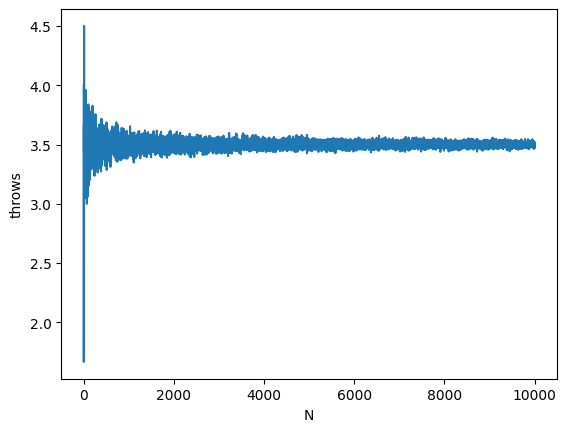

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
results = []
for num_throws in range(1,10000):
    throws = np.random.randint(low=1,high=7, size=num_throws)
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)
df = pd.DataFrame({'N':range(1,10000), 'throws' : results})
df
sns.lineplot(x='N',y='throws', data=df)

The x-axis of the graph shows the number of times the dice were rolled, with the leftmost value being the mean value obtained after only one roll (i.e., the denominator is 1) and the rightmost value being the mean value obtained after 10,000 rolls (denominator is 10,000). The more to the right, the smaller the fluctuation becomes. In other words, they are concentrated at 3.5. This is the law of large numbers.

[External website: Wikipedia: Law of Large Numbers](https://ja.wikipedia.org/wiki/%E5%A4%A7%E6%95%B0%E3%81%AE%E6%B3%95%E5%89%87)

### Central Limit Theorem

Another important theorem in data science is the **Central Limit Theorem**.

This theorem states that for random variables $X_1 ,X_2, \dots, X_n$ taken from a certain distribution according to a certain mean $\mu$ and a certain variance $\sigma^2$, if $n$ is large (that is, if the sample size is large), the $Z$ values calculated using these random variables follow a standard normal distribution, This is a theorem.

$$
Z = \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} 
$$

To put it simply, when the sample size is large, the "difference" between the sample mean and the population mean approaches a normal distribution with zero mean and $\frac{\sigma^2}{N}$ variance (so dividing by $\sqrt{\frac{\sigma^2}{N}}$ gives 1 variance), (So, dividing by $³$sqrt{\frac{\sigma^2}{N}}$, the variance becomes 1, which is the standard normal distribution. This is called **Central Limit Theorem**.

Let's try this. Let us take four probability distributions that are not **normal**: binomial, Poisson, geometric, and exponential.

The binomial and Poisson distributions have already been introduced. The geometric distribution represents, for example, the distribution of the number of trials required to get a certain number (e.g., 3) on a dice. The exponential distribution represents, for example, the period of time from one machine failure to the next. Please refer to the following URLs.

[Source: External site: Wikipedia: Geometric Distribution](https://ja.wikipedia.org/wiki/%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83)

[External website: Wikipedia: Exponential distribution](https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)

Each of these four probability distributions has the shape shown in the graph below. As explained previously, the shape of the distribution varies depending on the parameters ( expected value), but here 0.5 is specified for the binomial and geometric distributions, 1 for the Poisson distribution, and 2 for the exponential distribution.

Text(0.5, 1.0, 'Exponential')

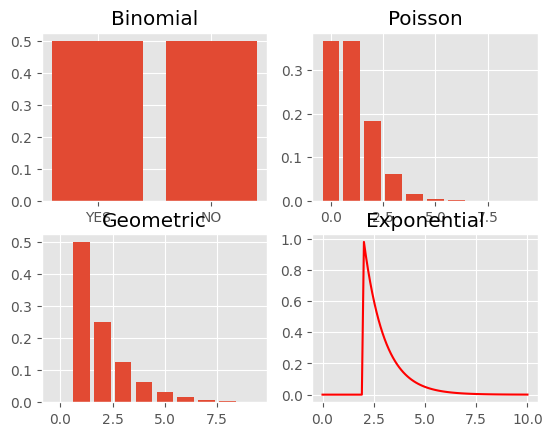

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
plt.style.use('ggplot')

fig = plt.figure()
## Let's compare the graph below with fig, axes = plt.subplots(nrows=2, ncols=2)

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)
## Binomial distribution (parameter 0.5 for Bernoulli trial)
axes1.bar(['YES','NO'], [0.5,0.5])
## Poisson distribution (parameter 1)
x =  np.arange(0, 10, 1)
y = [ss.poisson.pmf(i, 1) for i in x]
axes2.bar(x,y)
## Geometric distribution (parameter 0.5)
x =  np.arange(0, 10, 1)
y = [ss.geom.pmf(i, .5) for i in x]
axes3.bar(x,y)
## Exponential distribution (parameter 2.0)
x = np.linspace(0,10,100)
y = [ss.expon.pdf(i, 2.0) for i in x]
axes4.plot(x,y,'r')

axes1.set_title('Binomial')
axes2.set_title('Poisson')
axes3.set_title('Geometric')
axes4.set_title('Exponential')

For more information on the details of graph creation in Python in this lecture, please refer to the following websites and others, although questions will be accepted via web conferencing if necessary.

[External website: Qiita: Cheat Sheet for Graphing and Various Graph Implementations in Python](https://qiita.com/4m1t0/items/76b0033edb545a78cef5)

Incidentally, for **matplotlib**, **seaborn**, or Python libraries in general, it is often faster to check the sites of those packages directly, in the end, to find a solution, rather than wasting time searching on Google, etc.

[External site: matplotlib](https://matplotlib.org/)

[External site: seaborn](https://seaborn.pydata.org/)

To briefly explain the following graph creation process, an object corresponding to an image (canvas) is first created with **matplotlib**'s `figure()`, then this region is divided into subplots with `add_subplot()`, and each is given a name (it is also possible to make them into an array at once). (It is also possible to make them into an array by grouping them together.) Each plot (graph) is drawn in this subplot region (expressed as `axe` in Python).

Now, let us repeat the process of randomly taking 20,000 samples from each of these four distributions and finding the mean of the samples 30,000 times. In other words, we will obtain the mean of 30,000 samples from each of the binomial, Poisson, geometric, and exponential distributions, respectively. However, the following code takes several seconds to return the result. During this time, you may have the impression that your computer has frozen, but please wait for a while until the image appears.

In [19]:
import pandas as pd
samples_binom = []
samples_possion = []
samples_geometric = []
samples_exp = []
size = 20000

for n in range(1,30000):
    samples = np.random.binomial(1, 0.5, size=size)
    samples_binom.append(samples.mean())
    samples = np.random.poisson (lam=1, size=size)
    samples_possion.append(samples.mean()) 
    samples = np.random.geometric(p=0.5, size=size)
    samples_geometric.append(samples.mean())
    samples = np.random.exponential(scale=2.0,size=size)
    samples_exp.append(samples.mean())

df = pd.DataFrame({ 'binomial' : samples_binom, 
                     'poission' : samples_possion,
                     'geometric' : samples_geometric,
                    'exponential' : samples_exp})

Let's make a histogram of each result.

Text(0.5, 1.0, 'Exponential')

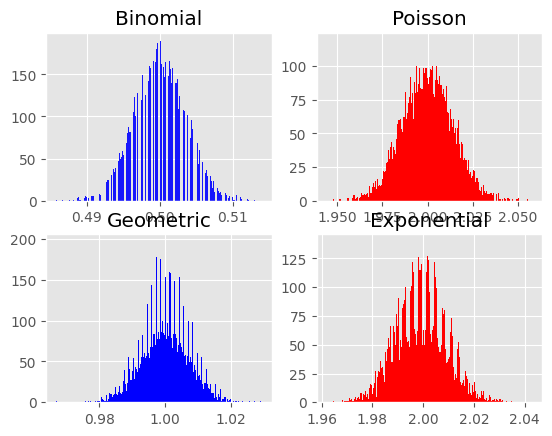

In [20]:
from matplotlib import pyplot as plt
## Let's compare the method of splitting the graphs above,
## which is different from the method used to create 
## the outline of each probability distribution
fig, axes = plt.subplots(nrows=2, ncols=2)
df.binomial.hist(color='blue',ax=axes[0,0], alpha=0.9, bins=1000)
df.exponential.hist(ax=axes[0,1],color='r',bins=1000)
df.poission.hist(ax=axes[1,0],color='blue',bins=1000)
df.geometric.hist(ax=axes[1,1],color='r',bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geometric')
axes[1,1].set_title('Exponential')

Although somewhat snarky, both histograms are close to a symmetrical bell-shaped graph. In other words, we may confirm that the graphs are close to those that characterize a normal distribution.

The fact that $Z$, the difference between the sample mean and the population mean divided by the **standard error**, follows a standard normal distribution with mean zero and standard deviation one is denoted by $Z \sim N(0,1)$. This simply means that the center of the graph's peak is at 0 on the x-axis and that the error spread (the left and right tail) is within the range of approximately -4 to +4 (although theoretically it ranges from $- \infty$ to $\infty$).

The **standard error** is the sample standard deviation $s$ divided by the square root of the number of data ($\frac{s}{\sqrt{n}}$). The standard error expresses how much the sample mean deviates from the population mean.

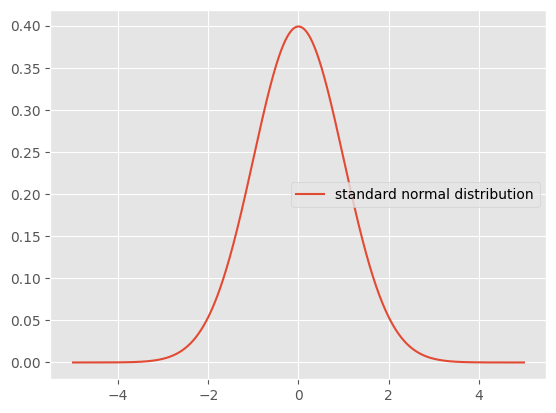

In [21]:
import scipy.stats as ss
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1
pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
plt.plot(x, pdf, label='standard normal distribution')
plt.legend()

The standard normal distribution would have 95% of the data fall within the range of approximately -1.96 to 1.96. Conversely, if the data follow the standard normal distribution, values smaller than -1.96 or larger than 1.96 have only a 2.5% chance of occurring, respectively. For example, if a value of less than -2.0 is shown as being "a number that comes from a distribution with a mean of 0 and a standard deviation of 1," the probability of obtaining such a small value is only 2.5%, which is a very rare value. However, one can also suspect that it is strange or odd to obtain a value that only has a 2.5% probability of occurring. What is strange? It is strange that the population from which the data was obtained assumes a distribution with a mean of 0 and a standard deviation of 1. <u>Really</u>, that is wrong, and we can suspect that this value of less than -2.0 <u>really</u> came from a distribution with a mean of -2 and a standard deviation of 1.

More aggressive. We assume that the mean is 0, but we get -2 as data. However, there is only a 2.5% chance of getting a value of -2 (less than). So, it is wrong to assume that the mean is 0. In other words, the data is obtained from a different population distribution (e.g., a normal distribution with a mean of -2). The mean is different to begin with.

**It is by this logic that statistical tests are used to show "differences in means".**

Let us apply this idea to the number of meetings attended. Furthermore, for the sake of simplicity, let us consider the number of meetings attended as a normal distribution (to be discussed later), since the number of meetings attended is (unfortunately) somewhat large, and therefore, whether we assume a Poisson distribution or a normal distribution does not make that much difference.

Then, assuming that the sample mean of the number of meetings attended by the 11 managers was about 19, we can consider whether this is close to the assumed population mean of the number of meetings attended by regular employees. However, we do not know the population mean, but let us assume (appropriately here) that the mean value of the number of meetings attended by general employees is 10. In other words, we assume a population with a mean of 10. Once the **population** mean is assumed, we can convert the difference from the **sample** mean of the managers into a $Z$ value. If the obtained $Z$ is between -1.96 and 1.96, we can conclude that the sample mean of managers is close to the population mean (and the assumed mean of the number of meetings attended by regular employees10). However, if the absolute value of $Z$ is greater than 1.96, then we would consider the sample mean of managers to be **different** from the population mean.

Of course, it is possible that this sample just happens to be extreme data (which would have a probability of 2.5% to 5%). However, there is another way to look at it. The distribution of the number of meetings attended by regular employees is different from that of regular employees. (Strictly speaking, one must distinguish between "different" and "more" or "less," but this will be discussed later.)

In fact, however, $Z$ cannot be calculated simply by setting the population mean. This is because we do not know the *population* standard deviation. What immediately comes to mind is to use the *sample* standard deviation instead. In fact, if we use the sample standard deviation instead of the population standard deviation in the formula for $Z$, $Z$ no longer follows a normal distribution. That distribution is called the t-distribution.

## 6.3　t-test

The **t distribution** is a distribution examined by William Sealy Gosset (1876-1937), who worked as an engineer at the Guinness Brewery (a beer production factory), famous for the Guinness Book of Records. It was mentioned in the previous section that the sample mean approaches the population mean as the number of data sets ($N$) increases (law of large numbers), but this does not mean that breweries (beer-producing factories) cannot take a large sample for inspection. Therefore, Gossett was faced with the need to know the accuracy of the sample mean, even when the sample size was small.

The t-distribution is a distribution shaped as follows. Three t-distributions with different parameters (described below) and a standard normal distribution are superimposed for comparison.

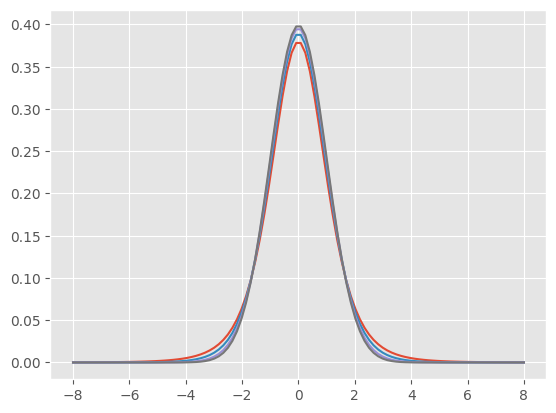

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-8,8,100)
for t in [5,10,30]:
    t_pdf = ss.t.pdf(x=x, df=t)
    ax.plot(x, t_pdf, label='t dist={}'.format(t))
ax.plot(x, ss.norm.pdf(x), label='normal dist')

The shape of the t-distribution is determined by the parameter **degree of freedom** (actually, there is another parameter that determines position, which is often specified in Bayesian estimation, but is not used here). What is degree of freedom? Intuitively, in the case of this data, there are 11 values in the sample, from which the sample mean is obtained. The sample can change each time the data is extracted, but once the sample mean is fixed, only 10 of the 11 values can change (please consider the reason for this on your own). This is the degree of freedom. In statistical tests, the expression "degree of freedom" is often used, so please be aware of it.

As the t-distribution increases in degree of freedom, its shape almost matches that of a normal distribution.

Based on this t-distribution, a test method has been devised to examine whether one sample mean is different from another mean, which is called the **t-test** or mean value test. Again, to find out if the mean is actually different, we need to find the $Z$ value, but to calculate the $Z$ value, we need to know the *population* standard deviation. However, in general, there is no information on the *population* standard deviation of the data. Therefore, instead of *population* standard deviation, *sample* standard deviation is used. However, the distribution substituted by *sample* standard deviation is no longer a normal distribution, but a t-distribution.

Suppose that the number of meetings attended by 11 managers in the last month was as follows.

<center>
Number of meetings attended by 11 managers in the last month

| 1st | 2nd | 3rd | 4th | 5th | 6th | 7th | 8th | 9th | 10th | 11th |
|-----|:----|:----|:----|:----|:----|:----|:----|:----|:-----|:-----|
| 23  | 16  | 23  | 20  | 18  | 19  | 19  | 15  | 20  | 22   | 23   | 
   
</center>

Let us test how much difference there is between this sample mean and the mean (we assume) number of 10 meetings that regular employees attend each month. This method of verification is called a **t-test**.

However, at the beginning of this document, we mentioned that the Poisson distribution can be fitted to the distribution of the number of meetings attended. In fact, the t-test **assumes** that the distribution of the data follows a normal distribution. In other words, the t-distribution is not appropriate as a method for testing the mean number of meetings attended.

However, a graphical check of the distribution of managers' attendance showed that it was almost symmetrical. Restated below.

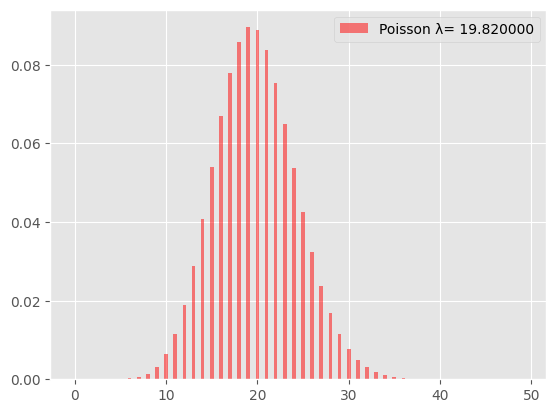

In [23]:
x =  np.arange(0, 50, 1)
y = [ss.poisson.pmf(i, 19.82) for i in x]
fig = plt.figure()
ax = fig.subplots()
ax.bar(x, y, align="center", width=0.4, color="red",
                alpha=0.5, label="Poisson λ= %f" % 19.82)
plt.legend()


It is known that when the mean value of the number of occurrences is large in the Poisson distribution, the distribution is close to a normal distribution. Or to put it another way, when the value of the parameter is large, the Poisson distribution can be approximated by a normal distribution.

Therefore, assuming that the number of meetings attended by managers is normally distributed, let us examine whether the sample mean of the number of meetings attended by managers is different from the (sample) mean of regular employees, which is about 4, by a t-test.

First, we calculate the t-value. If we follow the theoretical formula, we obtain the following results.

In [24]:
x = pd.Series(np.array([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23])) 
t_value = (x.mean() - 4.0)/ (x.std() /np.sqrt(11))# T-value
t_value

18.828699007716516

Is the t-value obtained from the difference between the sample mean of the number of meetings attended by the 11 managers selected as the sample and the sample mean of 4.0 for regular employees large or small?

This should be determined probabilistically.
Python's `t.cdf()` calculates the cumulative probability. In other words, it is the probability that the t-value is less than or equal to a certain t-value. Therefore, subtracting this value from 1.0, we can obtain the probability of obtaining a value larger than the specified t-value. Note that the t-distribution has a different shape depending on the degree of freedom, so we specify the degree of freedom as a parameter (`df=10`). Here the degree of freedom is the size of the administrative data minus 1.

In [25]:
1 - ss.t.cdf(t_value, df=10)

1.9341436230391196e-09

It would be obtained as approximately 1.93e-09.

This probability is almost zero. What this means is that if the mean number of meetings attended by regular employees (4.0) is used as the standard, there is almost no chance that the mean number of meetings attended by managers will exceed 20. If this is the case, we can conclude that it is inappropriate to assume the distribution of managers' meeting attendance to be the distribution of regular employees' meeting attendance. In other words, "managers attend more meetings than regular employees" has been shown probabilistically. This procedure is called **test**. The probability obtained by the t-test is also called the p-value.

## 6.4　The null and alternative hypotheses

In the previous section, we used a t-distribution to test the difference in the number of meetings attended by managers and regular employees. The mechanism was explained in some detail, but it must have seemed complicated. In general, the procedure for testing (in this case, the t-test) is formalized and can be easily verified using statistical tests.

The test begins with a hypothesis called the **null hypothesis**. This hypothesis corresponds to "no difference" or "means are equal. In the example of meeting attendance, the null hypothesis states that there is no difference in the average number of meetings attended between managers and regular employees. On the other hand, the **alternative hypothesis** states that there is a difference. In testing, the magnitude of the difference is determined probabilistically under the null hypothesis (assuming that the null hypothesis is true and valid). If this probability is less than a certain threshold, the data used in the analysis is considered to be a very rare sample. Typically, a threshold of 5% or 1% is used.

The test routine does not consider that something very rare (uncommon, unusual) happened (we happened to get a sample with an extremely large or small mean). Rather, we judge that it is strange that such a rare event should occur. We then rethink the assumption that the null hypothesis is correct. That is, we **reject** the null hypothesis and **accept** the alternative hypothesis. The alternative hypothesis is, in essence, "there is a difference," so we may say that there is a **significant difference**.

However, we must be aware that even if the null hypothesis is correct, it is very rare to obtain a sample with an extreme mean, so the **mistake** of accepting the alternative hypothesis can occur with a probability (e.g., 5%) of the standard value. This is expressed in statistics as **Type I error** (see below). Incidentally, not rejecting the null hypothesis when it is wrong is called a **Type II error**.

### 6.4.1　Tests with Python

Let's run a t-test in Python.

The null hypothesis is that "the mean number of meetings attended by managers is equal to the population mean of 4.0. In Python, we use `ttest_1samp()` (the letter after the underscore is the number 1) in the **scipy** library to specify the list of data and the population mean `popmean=4.0`.

In [26]:
x = pd.Series(np.array([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23]))
t,p = ss.ttest_1samp(x,popmean=4.0)
print("t value = {}:  p-value = {}".format(t, p))

t value = 18.828699007716516:  p-value = 3.8682873216199875e-09


The output shows a t-value of about 18.83 and a p-value of about 3.87e-09. In the t-test, there are two options: two-sided test and one-sided test. In the two-sided test, "there is a difference" is defined as the probability that the difference is either extremely large or extremely small compared to the mean of the comparison (in this case, 4.0, which is assumed to be the *population* mean of the number of meetings attended by the general workforce). Being "different" from the population mean of 4.0 includes the cases where the number of meetings is either (extremely) more or (extremely) less than 4.0. A positive t-value is the probability of "more". Therefore, the probability of "less" must also be obtained, but since the t-distribution is symmetrical, the probability of "more" should be doubled. That is the output in Python, 3.87e-09.

In a t-distribution (and normal distribution), the probability that one side is 5% is different from the probability that both sides together are 5%, so the two-tailed and one-tailed tests may give different results. (Although, in the case of the meeting attendance data we are currently dealing with, the difference would be considered "significant" in either case.)

In [27]:
# t-value on the right side when 5% on both sides
print(ss.t.ppf(0.975,df=10))
# t-value when only one side is 5%.
print(ss.t.ppf(0.95,df=10))
# ss.t.isf(0.05,df=10)

2.2281388519649385
1.8124611228107335


Text(0.5, 1.0, 'for TWO tailed Hypothesis Test:right tail t value :2.23')

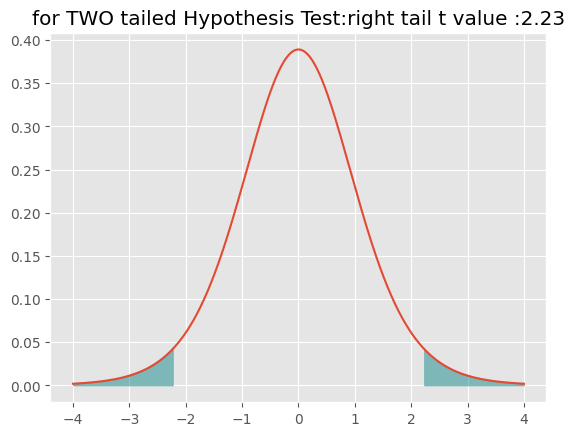

In [28]:
x = np.linspace(-4, 4,1000)
import scipy.stats as ss
import matplotlib.pyplot as plt
t_pdf = ss.t.pdf(x=x, df=10)
x2 = np.linspace(2.23,4,100)
x3 = np.linspace(-4, -2.23,100)
plt.plot(x, t_pdf)
plt.fill_between(x2, ss.t.pdf(x2,df=10), alpha=0.45, color='teal')
plt.fill_between(x3, ss.t.pdf(x3,df=10), alpha=0.45, color='teal')
plt.title("for TWO tailed Hypothesis Test:right tail t value :2.23")

<!-- ![](images/two-tailed.png)-->

On the other hand, a one-sided test examines greater than (or less than) the mean of the comparison.

Text(0.5, 1.0, 'for ONE tailed Hypothesis Test:right tail t value :1.81')

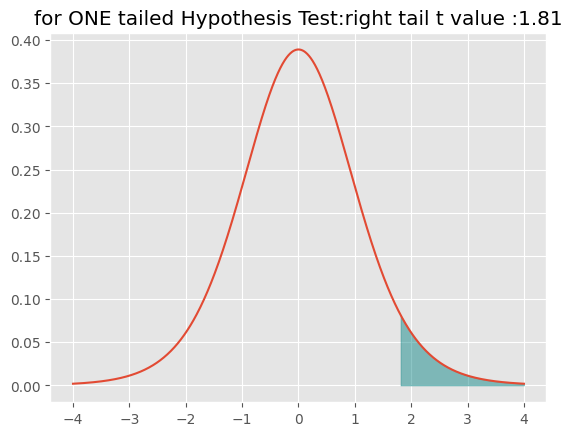

In [29]:
x = np.linspace(-4, 4,1000)
import scipy.stats as ss
import matplotlib.pyplot as plt
t_pdf = ss.t.pdf(x=x, df=10)
x2 = np.linspace(1.81,4,100)
# t_2 = ss.t(x2, df=10)
plt.plot(x, t_pdf)
plt.fill_between(x2, ss.t.pdf(x2,df=10), alpha=0.45, color='teal')
plt.title("for ONE tailed Hypothesis Test:right tail t value :1.81")

In the case of a two-sided test, the probability is the area of both the left and right hem, but since the t-distribution is symmetrical, the p-value can be obtained by doubling the value of one side. In contrast, in the one-sided test for "greater than", the area of the hem of the smaller hem (i.e., the probability) must be added to the hem on the right.

Python's **spicy** library actually only allows two-sided tests (not exactly, but it is cumbersome). On the other hand, Python's **statsmodels** library has functions that allow one-sided tests to be specified; if you are installing Python by any means other than Anaconda, you should run `pip3 install statsmodels`.

In [30]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(x, [10], alternative="larger")

(-4.321475416486785, 0.9999914757448681, 999.0)

Compared to the two-sided test, the p-value is larger. The 10.0 at the end of the output is the **degree of freedom**, which in this case is the number of data ($N$) minus 1.

In any case, a threshold for rejection is determined before conducting the test. Since 5% is generally used, based on this criterion, the null hypothesis is rejected and the alternative hypothesis is accepted. In other words, it is concluded that "managers attend more meetings than regular employees.

Incidentally, if the p-value were 5% or greater, the null hypothesis would not be rejected, but it is important to note that **this does not mean that the null hypothesis has been proven correct**. It just means that the sample did not provide a basis for rejecting the null hypothesis. In this case, the null hypothesis is said to be hold.

## 6.5　Comparison of two sample means

In the previous section, we tested whether the mean attendance frequency for managers is the same as the mean expected for regular employees (specifically, 4.0). This is called a one-sample comparison of means.

On the other hand, if the assumed mean is also obtained from another sample of data, we would test whether the means of each of the two samples are identical. This is called the **test of two sample means** (2 sample t test). Since, as in the present data, we have data on the number of meetings attended in the last month by selected employees from both management and regular employees, it is appropriate to perform a two-sample comparison of means

However, as discussed earlier, for the number of regular employees attending meetings, the Poisson distribution seems appropriate for their distribution. In contrast, the t-test presented in this section assumes that **the distribution of the data follows a normal distribution**. Strictly speaking, therefore, it is not appropriate to apply the t-test to data on meeting attendance.

On the other hand, the t-test is said to have **robustness**. In this case, robustness means that the test results are reliable even if some of the assumptions are not. The t-test is based on the following three assumptions

1. the population is normally distributed (normality)
2. the variances of the two groups are equal (homoscedasticity)
3. the samples are independent of each other (independency)

The last **sample independence** means that the observed values of one sample do not affect the observed values of the other sample. For example, if a regular employee also attends management meetings as an assistant (hosayaku, assistant), the number of meetings attended by the regular employee is dependent on the number of meetings held by the manager, and thus cannot be considered independent. In the present data, the two samples are considered to be independent.

Incidentally, there are cases in which the same subject is measured twice and the difference in the mean of each measurement is to be examined. Typical examples are the difference in blood pressure before and after taking medicine or the difference in weight before and after dieting. Again, the two samples are not independent. This is because the same subject is measured twice. A person who has always had high blood pressure may still have high blood pressure by general standards, even if the blood pressure is reduced after taking the medication. Also, a person who was overweight to begin with may be classified as overweight by general standards, even if he or she has lost some weight through dieting. In such cases, the data would be expressed as **paired**; if the paired data can produce a difference between the before and after measurements for each subject, this difference could be used to determine if there is a difference in the sample mean. This is called **test of paired means** (paired two sample t-test) (in contrast, a test without correspondence is expressed as independent two sample t-test).

The t-test is said to be robust with respect to the normal distribution assumption. This is because, due to the central limit theorem mentioned earlier, as the sample size ($N$) increases, the distribution of its sample mean approaches a normal distribution. However, it has been generally recommended to check whether it is safe to assume a normal distribution for the sample before conducting a t-test. In this case, the Shapiro-Wilk test is applied as a test of normality.

In [31]:
import scipy.stats as ss
ss.shapiro(x)
ss.shapiro(y)

ShapiroResult(statistic=0.701572060585022, pvalue=8.832278908244007e-09)

Here the null hypothesis is "the sample follows a normal distribution. If the rejection level is set at 0.05, the null hypothesis is not rejected for the data on managers, but is rejected for the data on regular employees. For the distribution of the number of meetings attended by regular employees, it would be more appropriate to assume a Poisson distribution rather than a normal distribution. As for homoscedasticity, on the other hand, the variance for the samples of managers and regular employees, respectively, is about 7.76 for the former and 1.3 for the latter. In **pandas**, the variance can be obtained with `var()`. As I pointed out before, this variance is unbiased. That is, the sum of squares of the deviation (difference from the sample mean) is divided by the number of data minus 1.

In [34]:
x = pd.Series(np.array([23, 16, 23, 20, 18, 19, 19, 15, 20, 22, 23]))
y = pd.Series([ 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6])
print(x.var())
print(y.var())

7.763636363636363
1.290909090909091


Since there is a six-fold difference in the variances, homoscedasticity is not intuitive. If we want to formally examine whether the variances are equal or not, we should perform a test of homoscedasticity. Lets implement Bartlett's test.

In [35]:
ss.bartlett(x,y)

BartlettResult(statistic=6.813732406280709, pvalue=0.009045949211930885)

Here the null hypothesis is "the variances of the two samples are equal" and the alternative hypothesis is "the variances of the two samples are not equal". When run, the null hypothesis is rejected. That is, the number of meetings attended by managers and the number of meetings attended by regular employees have different variances. (This is not surprising, since the two samples have different orders of magnitude and digits to begin with.) If the variances are not equal, we need to use Welch's method as a test of the mean of two samples; in Python, we can specify `equal_var=False` as the argument of the function `ttest_ind` to perform a t-test (of two independent samples) as follows.

In [36]:
ss.ttest_ind(x,y, equal_var=False)

Ttest_indResult(statistic=17.535105351229422, pvalue=1.5102573457776087e-10)

The null hypothesis is rejected and the alternative hypothesis is accepted. In other words, it can be concluded that the mean number of meetings attended differs between managers and regular employees. On the other hand, if the distribution of the population does not seem to be normal and the sample size is small, then the t-test is not appropriate. In such cases, a nonparametric test is appropriate. Nonparametric means that the test method does not assume any parameters. In the t-test, the sample mean and its sample standard deviation were used to estimate the expected value and standard deviation of the population. The nonparametric method does not use the sample mean or standard deviation, but uses the rank of each value in the sample data in order of magnitude. As a nonparametric method, let us try the Mann-Whitney U test.

In [38]:
ss.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=121.0, pvalue=7.386828793761141e-05)

### 6.5.1　Reconsideration of t-test procedure

In traditional statistics, when comparing means, or t-tests, (1) first a Shapiro-Wilks test is performed to see if the sample meets normality, (2) a test of homoscedasticity is performed, and then, following these results, (3) the appropriate t-test method is implemented.

However, there are criticisms of repeating multiple tests on the same data. For example, setting the significance level at 0.05 in a test means that even if there is no actual difference between the means of two samples, a "significant difference" will be found once in 20 tests. In other words, repeated tests are more likely to produce a significant difference.

Therefore, when comparing sample means, there is the idea that the normality test should be omitted based on the robustness of the t-test and that Welch's method should be used from the beginning, assuming that the variances are "not equal" from the beginning. In other words, if the two samples are `x` `y`, we can simply run the following code.

In [39]:
ss.ttest_ind(x,y, equal_var=False)

Ttest_indResult(statistic=17.535105351229422, pvalue=1.5102573457776087e-10)

Another thing to note is that traditional statistical tests are extremely prone to significant differences as the data size increases. As explained earlier, $N$ is placed in the denominator of the standard error calculation, and in the difference test, the width of this standard error is used as a guide. If $N$ is large, the standard error will be smaller, and thus the margin of error will be smaller.

For example, in the following, Data A contains the mathematics scores of 20,000 high school students in the Kanto region, and Data B contains the mathematics scores of 20,000 high school students in the Kansai region. Here, 50.1 is set as the population mean for the former and 49.9 for the latter. The standard deviations are both 10 (simulation, not actual data).

In [40]:
np.random.seed(123)
A = np.random.normal(50.1,10,size=200000)
B = np.random.normal(49.9,10,size=200000)
print(A.mean())
print(B.mean())

50.13035307247729
49.90282181722887


Although only 0.2 points of the population mean assumed for the two populations, a t-test reveals a significant difference. In other words, the high school students in the A data could be interpreted as being "better" than the high school students in the A data.

In [41]:
ss.ttest_ind(A,B)

Ttest_indResult(statistic=7.201325367281028, pvalue=5.973420896326329e-13)

Sure, there is a 0.2 point difference, but is there a **substantial** meaning to a 0.2 point difference in the mean on a 100-point test? Be aware that it is one thing to have a significant difference, and quite another to have a substantial difference in the mean of the data.

## 6.6　A/B Testing

In the previous section, the distribution of meeting attendance was considered a normal distribution, and t-tests were introduced as a statistical tests to determine differences in the mean (mean number of meetings attended).

In fact, the **chi-square test** is rather commonly used as a method to test frequency data such as attendance.

For example, consider an electronic commerce (EC) site that has a page introducing a certain product, and if the user likes the content, he/she can place an order by clicking the purchase button on the page. In this case, the design of the page may influence the user's purchase behavior (the decision to buy or not to buy).

Therefore, two designs, A and B, are prepared and displayed randomly each time a user connects. After one week of this test, we counted the number of conversions (purchases) for each design and obtained the following results (this is fictitious data, and the numbers are close for illustrative purposes).

<center>

Observations
|              | Converted | Not Converted | Total |
|--------------|:---------:|:-------------:|------:|
| Design A     |     65    |       185     |   250 |
| Design B     |     35    |       115     |   150 |
| Total        |    100    |       300     |   400 |

</center>

Incidentally, such an experiment is called an **A/B testing**. In addition, a table like the above, which summarizes the number of times for each condition, is called a **contingency table**. The **chi-square test** is often used as a method to test whether there is a significant difference in each number, especially in a contingency table with 2 rows and 2 columns. The following is a rather complicated explanation of the principle.

## 6.7　Chi-square test

**chi-square test** is also known as **test for independence**. The conditions correspond to the row and column categories. In this case, the objective is to determine whether differences in design affect the presence or absence of conversions. In other words, the **null hypothesis** is "there is no difference (difference) between the presence or absence of conversions due to differences in design," and the **alternative hypothesis** is "there is a difference (difference) between the presence or absence of conversions due to differences in design.

So, from the data, count the frequencies and create a frequency table. Compare this to a table based on the *theoretical proportions* that would be assumed if there were no differences in conditions.

In the case of the previous contingency table, if the differences in conditions had not affected the data, the theoretical frequency table would have looked like this

<center>

Expected frequencies
|                      | Converted | Not Converted | Total |
|----------------------|:---------:|:-------------:|------:|
| Design A             |    62.5   |       187.5   |   250 |
| Design B             |    37.5   |       112.5   |   150 |
| Total                |    100    |       300     |   400 |
</center>

This table is obtained as follows. In the actual observed results (Table: Observed Values), out of 400 accesses, 100 led to conversions. Therefore, the ratio of conversions is $100 \div 400 = 0.25$. On the other hand, the percentage of conversions that did not occur is $300 \div 400 = 0.75$.

If design differences have no effect, then (theoretically) 25% of both Design A and Design B should result in a conversion *yes*. That is, $250 \times 0.25 = 62.5, 150 \times 0.25 = 37.5$.

Similarly, the no conversion would be $250 \times 0.75 = 187.5, 150 \times 0.75 = 112.5$. The theoretically determined frequency is called the expected frequency.

The chi-square test is used to determine whether the difference between this expected frequency and the actual observed data is significantly greater. First, the difference between the corresponding cells in each table is found and *squared*, and then divided by the expected frequency.

<center>

Expected frequencies
|                      | Converted            | Not Converted        | Total |
|----------------------|:--------------------|:---------------------|:------|
| Design A             | $(65 - 62.5)^2/62.5$ | $(185 -187.5)^2/187.5$ |       |
| Design B             | $(35 - 37.5)^2/37.5$ | $(135 - 112.5)^2/112.5$ |     |
| Total                | 100                  | 300                   | 400   |

</center>

The following is a summary.

<center>

Chi-Square Expected frequencies
|                     | Converted | Not Converted | Total |
|---------------------|:---------:|:-------------:|------:|
| Design A            |    0.1    |      0.033    |  0.133|
| Design B            |    0.167  |      0.056    |  0.223|
| Total               |    0.267  |      0.089    |  0.356|

</center>

These represent the difference between the observed data and the theoretical values, the sum of which is called the **chi-square value**. When this statistic is greater than a predetermined criterion value, the null hypothesis is rejected and the alternative hypothesis is accepted in the **test of independence** (chi-square test). As the criterion value, a chi-square value is used where the p-value is less than 0.05. Incidentally, the chi-square value has the following distribution

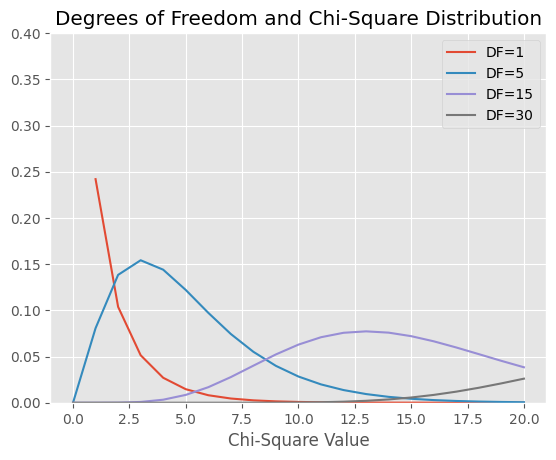

In [54]:
df_values = [1, 5, 15, 30]
chisq_values = np.arange(0, 21)
density_values = ss.chi2.pdf(chisq_values.reshape(-1, 1), df=df_values)

fig, ax = plt.subplots()
ax.plot(chisq_values, density_values[:, 0], label='DF=1')
ax.plot(chisq_values, density_values[:, 1], label='DF=5')
ax.plot(chisq_values, density_values[:, 2], label='DF=15')
ax.plot(chisq_values, density_values[:, 3], label='DF=30')
ax.set_ylim(0, 0.4)
ax.set_title('Degrees of Freedom and Chi-Square Distribution')
ax.set_xlabel('Chi-Square Value')
ax.legend()
plt.show()

The distribution of chi-square values depends on the **degrees of freedom**. The number of degrees of freedom is formally expressed as (number of rows - 1) x (number of columns - 1) in the chi-square test, where 2 rows and 2 columns equals 1.

For the test of independence, we consider the probability of the right hem of the chi-square distribution (incidentally, the left side is sometimes used as the probability that the observed and expected values are too close). We examine the value of the x-axis for which the area of the right-hand side is 0.05, and compare it to the chi-square value obtained from the contingency table. If the latter value is greater than the former, the null hypothesis is rejected.

The value that is the rejection point on the right side of the chi-square distribution with 1 degree of freedom is about 3.84, but the chi-square value obtained in this case is about 0.36, which is smaller than this value. Therefore, we cannot reject the null hypothesis.

Returning to our first example, we cannot conclude that differences in site design have an effect on whether or not a site converts.

While the above is the principle, the software allows us to conclude as follows.

In [55]:
AB = np.array([[65,185], [35,115]])
AB
ss.chi2_contingency(AB, correction=False)

Chi2ContingencyResult(statistic=0.3555555555555555, pvalue=0.5509849875850935, dof=1, expected_freq=array([[ 62.5, 187.5],
       [ 37.5, 112.5]]))

The output is, in order, a table of chi-square statistics, p-values, degrees of freedom, and expected frequencies.

Note that ` np.array([[65,185],[35,115]])` is used to create the data (frequency table). There are more brackets inside the brackets, which are instructions to create a two-dimensional array of data.

## 6.8　Analysis of Variance

The t-test was a method to test whether there is a significant difference between the means of two samples. How, then, can we compare three or more means?

Earlier, we used an exploratory analysis to check the effect of the type of chicken feed on growth using a boxplot. Viewed differently, this is the task of having a sample for each type of feed and checking whether there is a difference in the means for each level, even in the population, based on the sample mean for each.

Let's find the mean and variance for each level of the bait.

In [56]:
chickwts = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/DS/data/chickwts.csv")
chickwts.groupby('feed').agg(['mean', 'var'])

weight             
                 mean          var
feed                              
casein     323.583333  4151.719697
horsebean  160.200000  1491.955556
linseed    218.750000  2728.568182
meatmeal   276.909091  4212.090909
soybean    246.428571  2929.956044
sunflower  328.916667  2384.992424

Here the factor of food (categorical variable) has six levels. It may come to mind to conduct a t-test for each pair. This is called **multiple comparison**.

However, this method is not appropriate. In this case, there are 15 pairs.

In [57]:
from scipy.special import comb
comb(6,2)

15.0

By the way, in statistical tests, the null hypothesis is determined by setting a rejection level, and if 5% is used as the level, the probability of **Species 1 error** is 0.05. From a different perspective, this means that even if there is no difference in the mean, the result is significant one out of every 20 times. In the case of this data, there are 15 pairs, so you can imagine that the probability that any one of them will be judged significant by chance is high.

Suppose there are three levels of data. In fact, suppose that the mean of each of these three is the same, i.e., there is no difference. We now perform three tests for each pair. The probability of (correctly) finding no difference in each test is 0.95, and the probability of (incorrectly) finding a significant difference is 5%.

Conversely, the probability of finding a significant difference at least once out of the three tests is 1-0.86 = 0.14. In other words, the rejection level is effectively 0.14. In other words, the rejection level is effectively set as low as 0.14. In the same way, if we perform the test 15 times, the rejection level becomes extremely lenient, about 0.54. In other words, there is more than a 50% chance that one or more pairs will be identified as "significantly different" even though there is actually no difference in the means.

In this case, the simplest way to deal with the situation is to divide 0.05 by 15 and use that as the rejection level. However, if this is done, the problem arises that the difference cannot be detected even though there is actually a difference. In other words, the possibility of a **Type II error** is increased. Therefore, several methods have been proposed to reduce the probability of the Type II error, but not to increase the probability of the Type I error. In this document, we do not go into details, but only introduce a method to perform multiple testing in software.

### 6.8.1　Multiple Comparison Procedure

Tukey's multiple comparison procedure (Tukey honestly significant difference), presented here, makes the assumption that the distribution of each group follows a normal distribution and that the variances of each are equal. If this condition is not met, nonparametric multiple comparisons must be used (e.g., the Steel-Dwass method).

Tukey's HSD uses a different method for calculating the t-value: whereas the t-test calculation uses the group variance as the denominator, Tukey uses the error variance, which is the sum of the group variances divided by the degrees of freedom. This t-value is checked against a studentized range distribution rather than a t-distribution.

In [58]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
res = pairwise_tukeyhsd(chickwts['weight'], groups=chickwts['feed'], alpha=0.01)
print(res.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.01      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
   casein horsebean -163.3833    0.0 -245.9644 -80.8023   True
   casein   linseed -104.8333 0.0002 -183.5713 -26.0954   True
   casein  meatmeal  -46.6742 0.3325 -127.1818  33.8333  False
   casein   soybean  -77.1548 0.0084 -153.0285   -1.281   True
   casein sunflower    5.3333 0.9999  -73.4046  84.0713  False
horsebean   linseed     58.55 0.1413   -24.031  141.131  False
horsebean  meatmeal  116.7091 0.0001   32.4391 200.9791   True
horsebean   soybean   86.2286 0.0042    6.3737 166.0834   True
horsebean sunflower  168.7167    0.0   86.1356 251.2977   True
  linseed  meatmeal   58.1591 0.1277  -22.3484 138.6666  False
  linseed   soybean   27.6786 0.7933  -48.1952 103.5523  False
  linseed sunflower  110.1667 0.0001   31.4287 188.9046   True
 meatmeal   soybean  -30.4805 0.7391 -108.1891  47.2281

The output lists 15 pairs for each type of food and whether there is a significant difference at the 5% level in the mean of the weights for each. If the rightmost `reject` is `True`, it means that there is a difference in the means of the pairs. The results of multiple comparisons can also be graphed as follows.

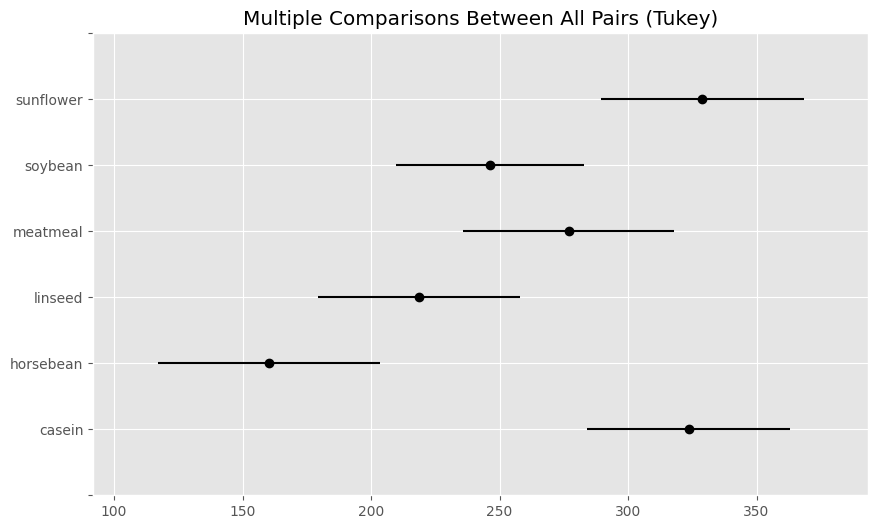

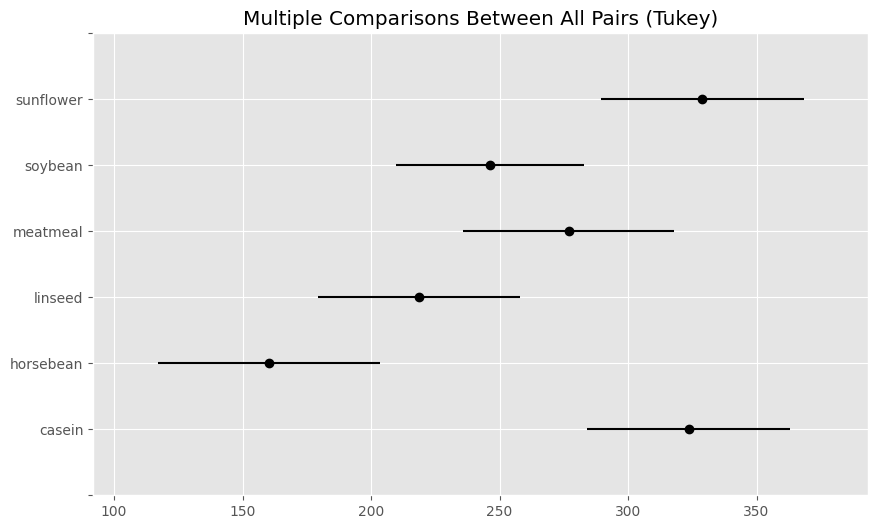

In [59]:
res.plot_simultaneous()

In this graph, 95% confidence intervals for the mean are displayed for each of the bait levels shown on the far left.

In general, the sample mean does not coincide with the population mean. However, we consider the true mean (population mean) to be within a range centered on the sample mean. To find the range, we need the population variance, but in general, the population variance is not known. Therefore, we substitute the sample variance, and the distribution of the mean value substituted by the sample variance will be t-distribution. Therefore, t-value is also used to obtain the range. Specifically, the range is obtained as "t-value × sample standard deviation × square root of sample size.

Then, the following calculations are performed.

- Lower limit: sample mean - t-value × sample standard deviation × square root of sample size
- Upper limit: sample mean + t-value × sample standard deviation × square root of sample size

The range between the lower and upper limits is called the 95% confidence interval.

The thick horizontal line output in the graph represents the 95% confidence interval of the mean value at each feeding. If this confidence interval does not overlap for a given pair, we can assume that there is a significant difference between the means for that pair.

For example, the bottom casein the bottom row does not overlap the line with the horsebean immediately above it. In other words, we can conclude that there is a significant difference in the mean weight between casei and horsebean. On the other hand, there is an overlap with the 95% confidence interval for meatmeal. Therefore, it can be concluded that there is no difference in the mean weight between casein and meatmeal.

## quiz

After reading this content,
**"Week 6 Quiz (all must answer) "**
after reading this content. By taking the quiz, you will be considered to have attended the Week 6 lecture.